In [91]:
# -*- coding: utf-8 -*-
#Filename:seaborn_examples.py
#Date: 10/09/2021
#Purpose: Practice seaborn-based examples 
#@author: AbhishekKumar

In [92]:
#List of potential imports, remove hash when required
#import argparse
#import json
#import requests
import numpy as np
#import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#import matplotlib.patches as patches
#import matplotlib.path as path
#import matplotlib.animation as animation
#install python packages
#from matplotlib.ticker import ScalarFormatter

# example 1 Bivariate plot with multiple elements

In [2]:
sns.set_theme(style="dark")

In [3]:
# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T
# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

<AxesSubplot:>

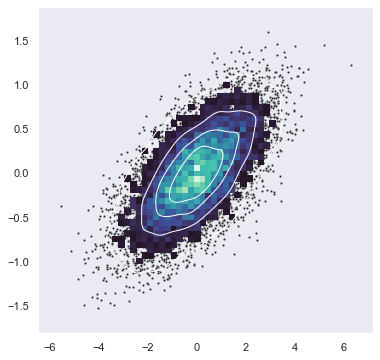

In [6]:
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

# example 2 - grouped boxplot

In [7]:
sns.set_theme(style="ticks", palette="pastel")

In [8]:
# Load the example tips dataset
tips = sns.load_dataset("tips")

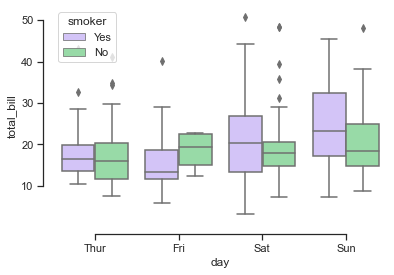

In [9]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

# example 3 - Scatterplot heatmap¶

In [11]:
sns.set_theme(style="whitegrid")

In [12]:
# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

In [13]:
# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name="correlation")

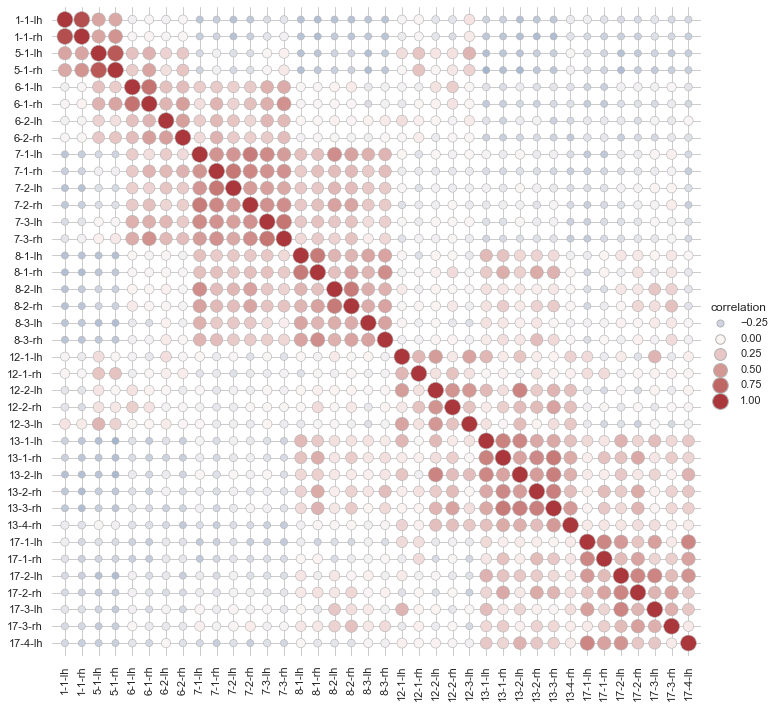

In [17]:
# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
    )
# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

# example 4 - Anscombe’s quartet

In [19]:
sns.set_theme(style="ticks")

In [20]:
# Load the example dataset for Anscombe's quartet
df2 = sns.load_dataset("anscombe")

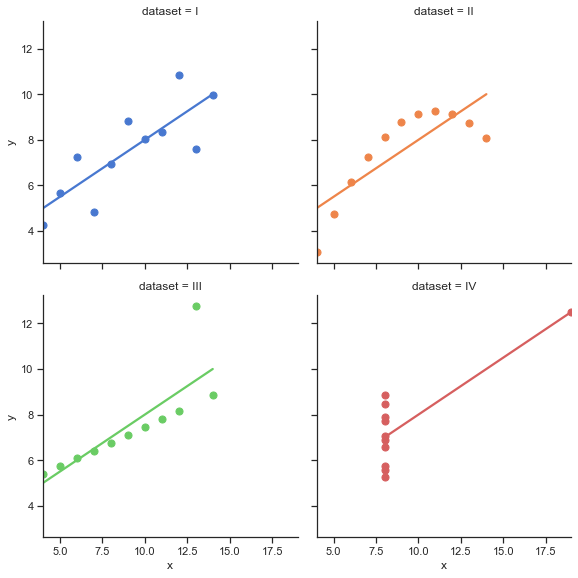

In [21]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df2,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# example 5 - Scatterplot with multiple semantics

In [23]:
sns.set_theme(style="whitegrid")

In [24]:
# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

<AxesSubplot:xlabel='carat', ylabel='price'>

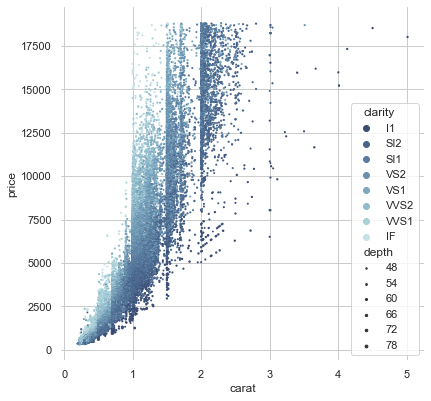

In [25]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

# example 6 - Timeseries plot with error bands

In [27]:
sns.set_theme(style="darkgrid")

In [28]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

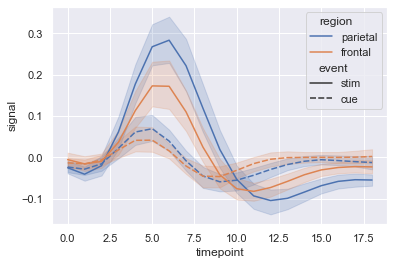

In [29]:
# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

# example 7 - Facetting histograms by subsets of data

In [30]:
sns.set_theme(style="darkgrid")

In [31]:
df3 = sns.load_dataset("penguins")

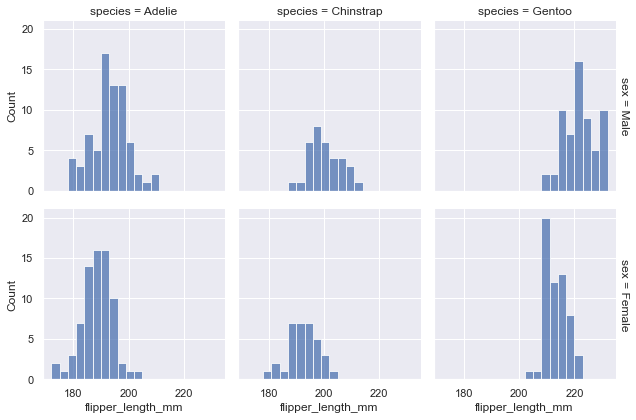

In [32]:
sns.displot(
    df3, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

# example 8 - Line plots on multiple facets

In [33]:
sns.set_theme(style="ticks")

In [34]:
dots = sns.load_dataset("dots")

In [35]:
# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

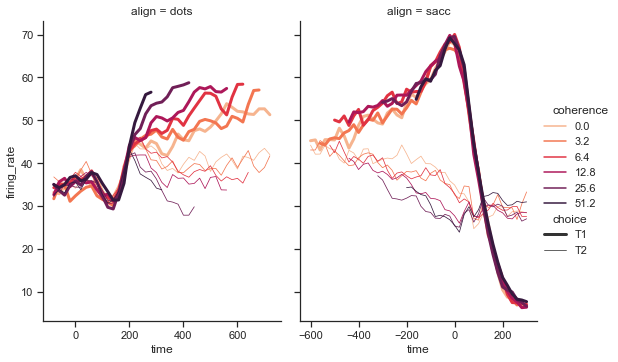

In [36]:
# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

# example 9 - Grouped barplots

In [37]:
sns.set_theme(style="whitegrid")
penguins = sns.load_dataset("penguins")

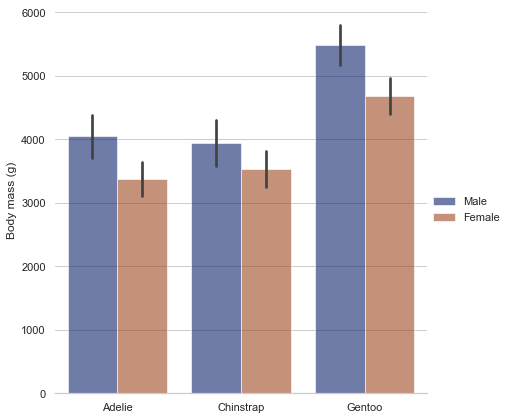

In [38]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

# example 10 - Grouped violinplots with split violins

In [40]:
sns.set_theme(style="whitegrid")

In [41]:
# Load the example tips dataset
tips = sns.load_dataset("tips")

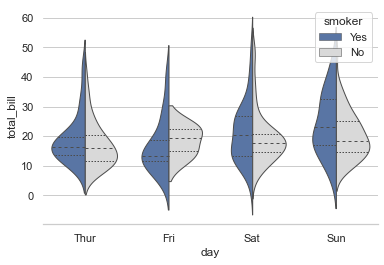

In [49]:
# Draw a nested violinplot and split the violins for easier comparison - blue & grey
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

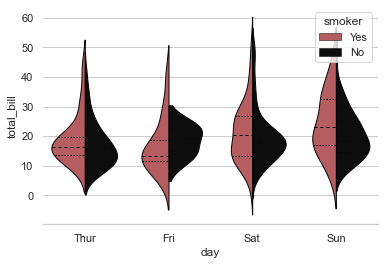

In [50]:
# Draw a nested violinplot and split the violins for easier comparison - red & black
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "r", "No": ".05"})
sns.despine(left=True)

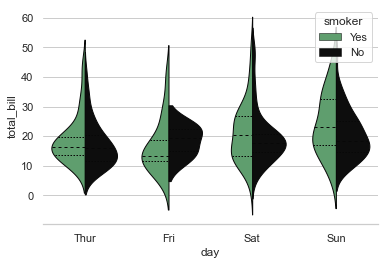

In [51]:
# Draw a nested violinplot and split the violins for easier comparison - red & black
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "g", "No": ".05"})
sns.despine(left=True)

# example 10 - Hexbin plot with marginal distributions¶

In [52]:
sns.set_theme(style="ticks")

In [58]:
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

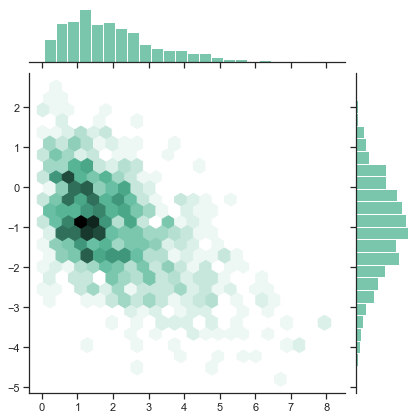

In [59]:
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

In [ ]:
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

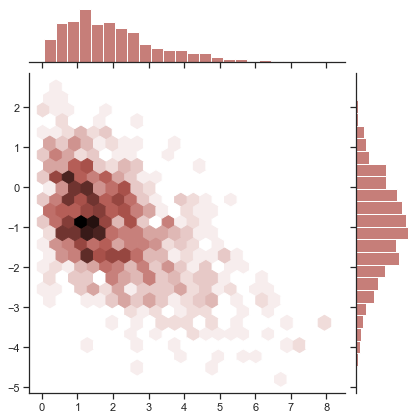

In [60]:
sns.jointplot(x=x, y=y, kind="hex", color="#b3534c")

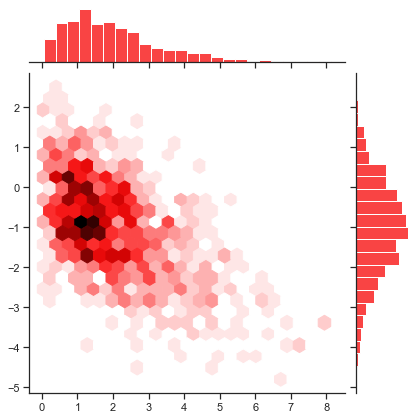

In [61]:
sns.jointplot(x=x, y=y, kind="hex", color="#f70505")

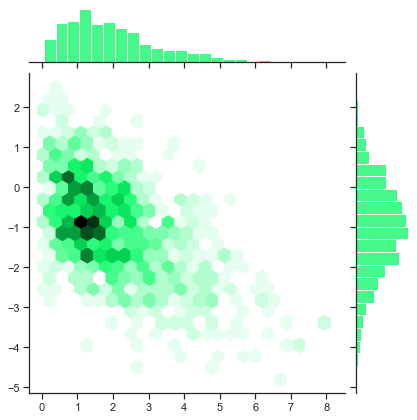

In [62]:
sns.jointplot(x=x, y=y, kind="hex", color="#05f762")

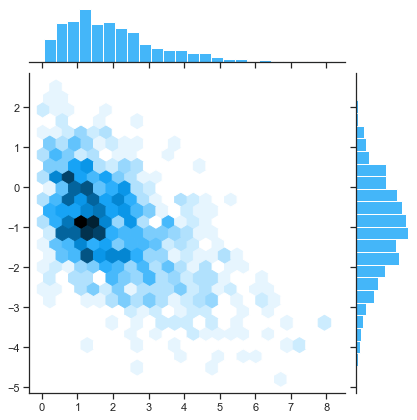

In [63]:
sns.jointplot(x=x, y=y, kind="hex", color="#059ef7")

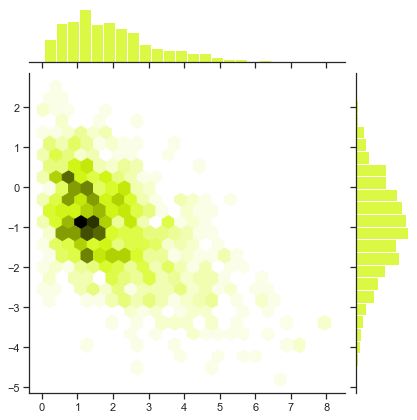

In [64]:
sns.jointplot(x=x, y=y, kind="hex", color="#cff705")

# example 11 - Stacked histogram on a log scale

In [66]:
sns.set_theme(style="ticks")

In [67]:
diamonds = sns.load_dataset("diamonds")

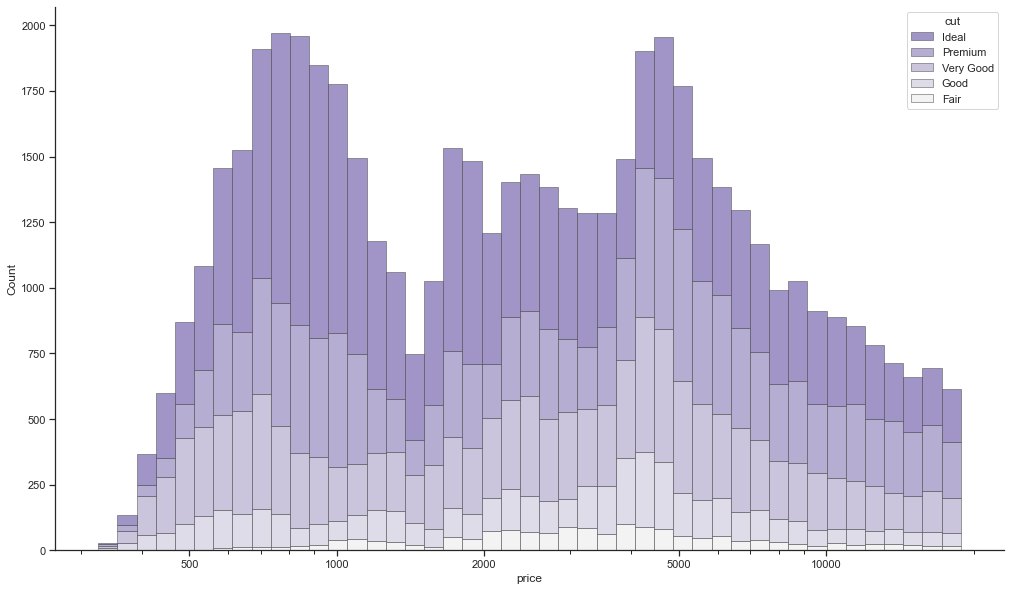

In [81]:
f, ax = plt.subplots(figsize=(17, 10))
sns.despine(f)
sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

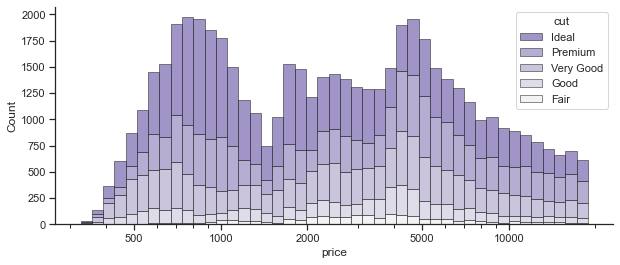

In [82]:
f, ax = plt.subplots(figsize=(10, 4))
sns.despine(f)
sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".1",
    linewidth=.5,
    log_scale=True,
)

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [83]:
# example 12 - Horizontal boxplot with observations

In [84]:
sns.set_theme(style="ticks")

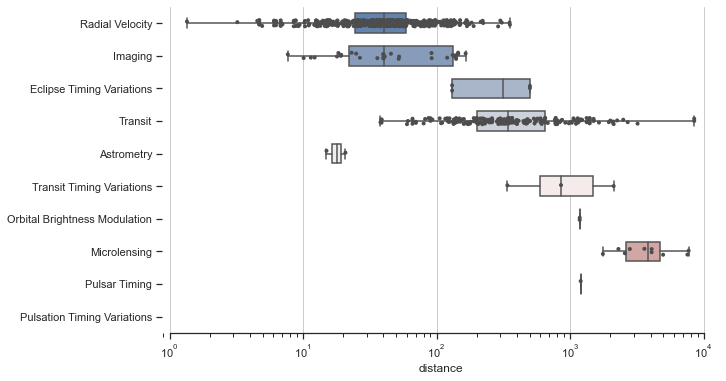

In [89]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)